<a href="https://colab.research.google.com/github/DrBharathiTC/Play_store-app-review-analysis-Capstone-project/blob/main/Google_Play_Store_Apps_Data_Analysis_(EDA)_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

# The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
# Explore and analyze the data to discover key factors responsible for app engagement and success.

# **LIBRARIES USED**

In [3]:
import pandas as pd               # To manipulate data
import numpy as np                # To do mathematical operation
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization
import plotly.express as px       # for data visualization in more efective way

pandas - pd is to manipulate data

numpy - np is to do mathematical operation

matplotlib.pyplot - plt is for data visualization

seaborn - sns is for data visualization

plotly.express - px is for data visualization in more efective way

# **MOUNTING DRIVE**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **READING DATA FRAME**

In [5]:
PSDF1=pd.read_csv("/content/drive/MyDrive/almabetter projects/EDA-playstore/Playstoredata.csv")

In [6]:
PSDF2=pd.read_csv("/content/drive/MyDrive/almabetter projects/EDA-playstore/User Reviews.csv")

# **NOW WE ARE READING THE AVAILABLE DATA**

In [7]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
PSDF1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
PSDF1.shape

(10841, 13)

In [11]:
PSDF1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
col_name = PSDF1.columns

In [13]:
col_name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **DATA CLEANING**
Data Cleaning It is a crucial step which includes:

Dropping Duplicates Finding NaN, Nulls and missing values Validating data to a standard pattern

### **DROPPING DUPLICATE VALUES**

In [14]:
len(PSDF1[PSDF1.duplicated()])

483

In [15]:
dup = PSDF1[PSDF1.duplicated()]
dup

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [16]:
PSDF1.drop_duplicates(inplace=True,ignore_index=True)
PSDF1.reset_index(inplace=True,drop=True)

In [17]:
len(PSDF1[PSDF1.duplicated()])

0

### **CHECKING NULL OR MISSING VALUES**

In [18]:
PSDF1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
PSDF1.isnull().sum().sort_values(ascending= False)

Rating            1465
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

### **CHECKING OUTLIERS**

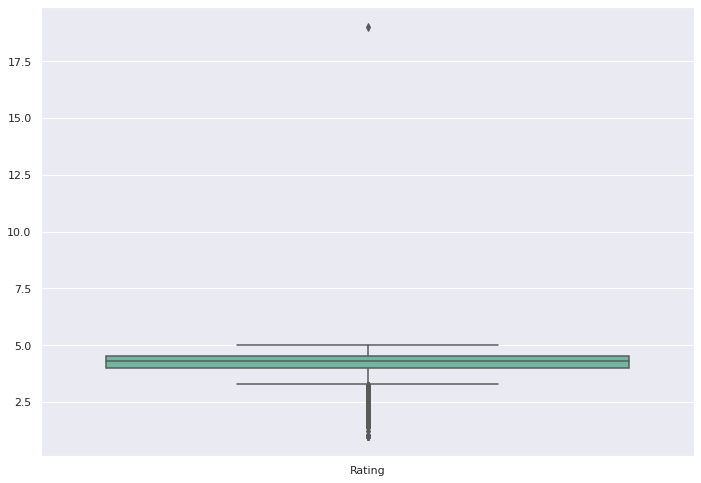

In [20]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=PSDF1, orient="v", palette="Set2")

**DEFINE A FUNCTION**
to get more info from any dataset at once (like data_type, count of apps, missing values in each columns and number of unique elements in each column)

Checking more info using defined function

In [21]:
def playstoreinfo():
  temp=pd.DataFrame(index=PSDF1.columns)
  temp["datatype"]=PSDF1.dtypes
  temp["not null values"]=PSDF1.count()
  temp["null value"]=PSDF1.isnull().sum()
  temp["% of the null value"]=PSDF1.isnull().mean()
  temp["unique count"]=PSDF1.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10358,0,0.000000,9660
Category,object,10358,0,0.000000,34
Rating,float64,8893,1465,0.141437,40
Reviews,object,10358,0,0.000000,6002
Size,object,10358,0,0.000000,462
Installs,object,10358,0,0.000000,22
Type,object,10357,1,0.000097,3
Price,object,10358,0,0.000000,93
Content Rating,object,10357,1,0.000097,6
Genres,object,10358,0,0.000000,120


In [22]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


**CHANGING DATATYPE OF SIZE FROM OBJECT TO FLOAT**

**Converting Size from object to float**

In [23]:
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: float(x))

In [24]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            8832 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [25]:
PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**REPLACING '+',',' WITH '' IN 'Installs' TO CONVERT ITS DATA TYPE**

In [26]:
PSDF1['Installs'] = PSDF1['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x) 
PSDF1['Installs'] = PSDF1['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x) 

**REPLACING '$' WITH '' IN 'PRICE' TO CONVERT ITS DATA TYPE**

In [27]:
PSDF1["Price"] = PSDF1["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

In [28]:
PSDF1.shape

(10358, 13)

In [29]:
PSDFfree = PSDF1[PSDF1.Installs=="Free"]
PSDFfree

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**ROW 9990 REMOVED DUE TO MISSING VALUE OF CATEGORY**

In [30]:
PSDF1.drop(PSDF1.index[9990], inplace=True)

**Converting 'Reviews', 'Installs', 'Size', 'Price' to numerical data type**

In [31]:
PSDF1['Reviews']=pd.to_numeric(PSDF1['Reviews'])
PSDF1['Installs']=pd.to_numeric(PSDF1['Installs'])
PSDF1['Size']=pd.to_numeric(PSDF1['Size'])
PSDF1['Price']=pd.to_numeric(PSDF1['Price'])

In [32]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**Getting statitical values of numerical columns.**

In [33]:
PSDF1.describe()

,Rating,Reviews,Size,Installs,Price
count,8892.000000,1.035700e+04,8831.000000,1.035700e+04,10357.000000
mean,4.187877,4.059046e+05,21.287413,1.415776e+07,1.030800
std,0.522377,2.696778e+06,22.540591,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,4.700000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,29.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


**Replacing nan values in size with the its median value**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


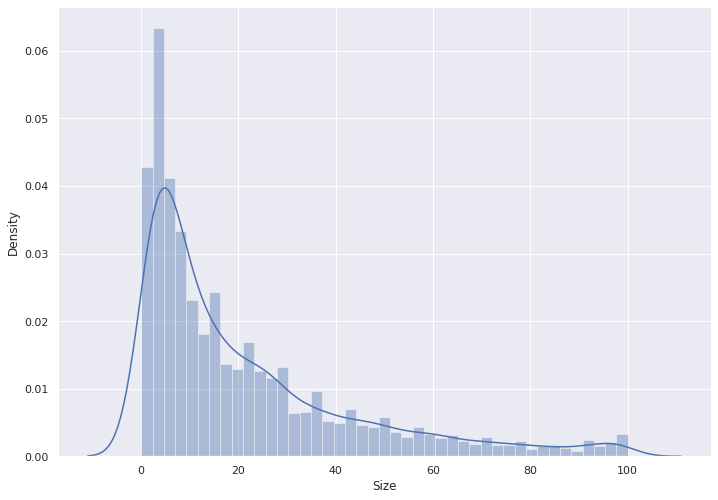

In [34]:
sns.distplot(PSDF1['Size'])

since "size" data distribution is skewed we need to replace missing values with median



In [35]:
PSDF1.Size.fillna(PSDF1.Size.median(),inplace=True)

**Filling missing values , through median and mode in PSDF**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


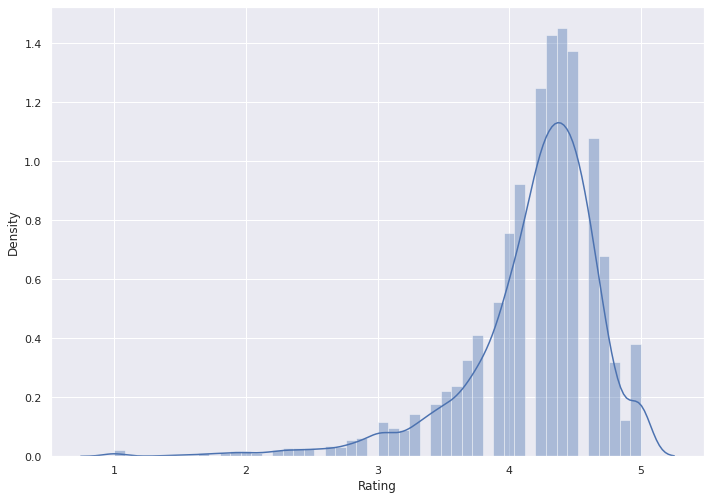

In [36]:
sns.distplot(PSDF1['Rating'])

In [37]:
PSDF1['Rating'].median ()


4.3

In [38]:
PSDF1['Rating'].fillna(4.3,inplace=True)

In [39]:
PSDF1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [40]:
PSDF1['Type'].mode()

0    Free
dtype: object

In [41]:
PSDF1['Android Ver'].mode()

0    4.1 and up
dtype: object

In [42]:
PSDF1['Current Ver'].mode()

0    Varies with device
dtype: object

In [43]:
PSDF1['Type'].fillna('Free',inplace=True)
PSDF1['Android Ver'].fillna('4.1 and up',inplace=True)
PSDF1['Current Ver'].fillna('Varies with device',inplace=True)

PSDF1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [44]:
PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
PSDF1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10357,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [46]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**Dropping the least important columns which are not helpful for our**

In [47]:
PSDF1.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)
PSDF1.dropna(inplace=True)

In [48]:
# Calling the function playstoreinfo1 defined above

playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10357,0,0.0,9659
Category,object,10357,0,0.0,33
Rating,float64,10357,0,0.0,39
Reviews,int64,10357,0,0.0,6001
Size,float64,10357,0,0.0,459
Installs,int64,10357,0,0.0,20
Type,object,10357,0,0.0,2
Price,float64,10357,0,0.0,92
Content Rating,object,10357,0,0.0,6
Genres,object,10357,0,0.0,119


**Getting the statistical info about the numerical data**


In [49]:
PSDF1.describe()

,Rating,Reviews,Size,Installs,Price
count,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000
mean,4.203737,4.059046e+05,20.066346,1.415776e+07,1.030800
std,0.485594,2.696778e+06,21.019993,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


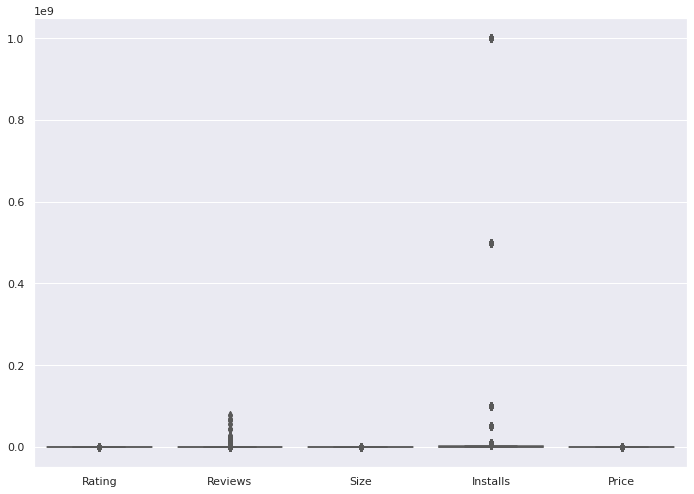

In [50]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=PSDF1, orient="v", palette="Set2")

In [51]:
# Removing outliers of Rating
percentile_25 = np.percentile(PSDF1['Reviews'],25)
percentile_75 = np.percentile(PSDF1['Reviews'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
PSDF1.drop(index=PSDF1[PSDF1['Reviews']>upper_outlier_bound].index,axis=0,inplace=True)
PSDF1.drop(index=PSDF1[PSDF1['Reviews']<lower_outlier_bound].index,axis=0,inplace=True)

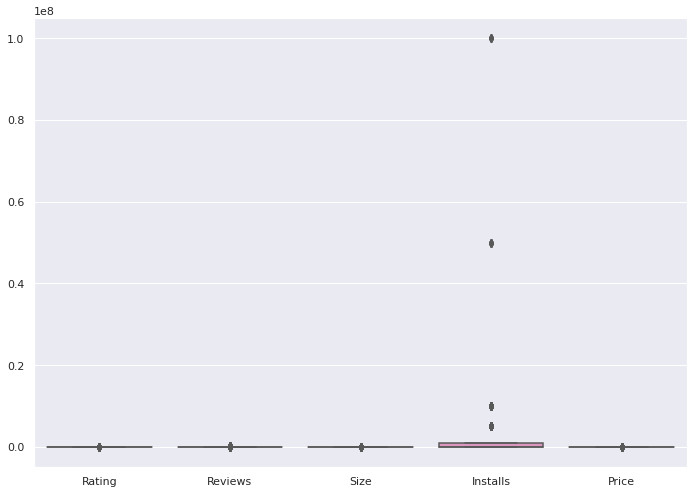

In [52]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=PSDF1, orient="v", palette="Set2")

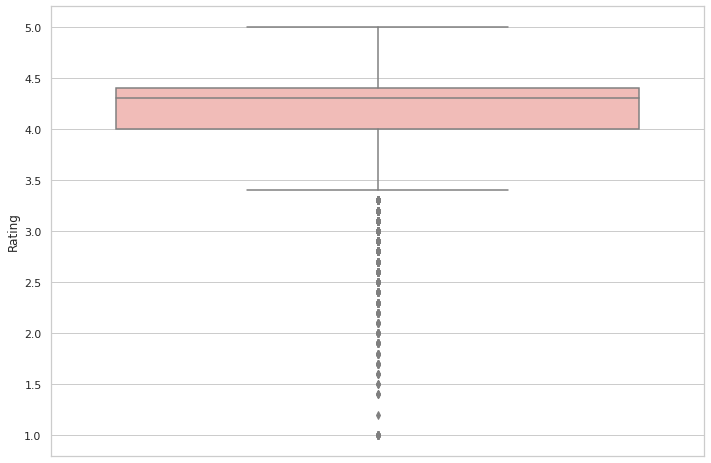

In [53]:
sns.set_style('whitegrid')
sns.boxplot(y=PSDF1['Rating'], palette='Pastel1');
plt.show()

In [54]:
# Removing outliers of Installs
percentile_25 = np.percentile(PSDF1['Installs'],25)
percentile_75 = np.percentile(PSDF1['Installs'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
PSDF1.drop(index=PSDF1[PSDF1['Installs']>upper_outlier_bound].index,axis=0,inplace=True)
PSDF1.drop(index=PSDF1[PSDF1['Installs']<lower_outlier_bound].index,axis=0,inplace=True)

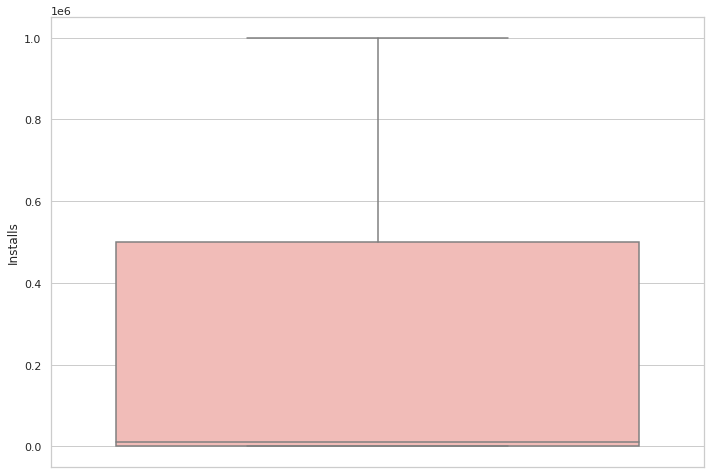

In [55]:
sns.set_style('whitegrid')
sns.boxplot(y=PSDF1['Installs'], palette='Pastel1');
plt.show()


# **EXPLORATORY ANALYSIS**

We will perform analysis based on

Univariate study

Multivariate study

# **1. UNIVARIATE ANALYSIS**

**Top 35 category present**

In [56]:
top_categories = PSDF1['Category'].value_counts().sort_values(ascending=False).head(35)
top_categories

FAMILY                 1568
TOOLS                   654
GAME                    559
MEDICAL                 406
BUSINESS                386
LIFESTYLE               329
PERSONALIZATION         312
FINANCE                 310
PRODUCTIVITY            280
SPORTS                  253
HEALTH_AND_FITNESS      234
NEWS_AND_MAGAZINES      220
COMMUNICATION           217
BOOKS_AND_REFERENCE     189
DATING                  175
SOCIAL                  173
TRAVEL_AND_LOCAL        166
PHOTOGRAPHY             159
SHOPPING                133
VIDEO_PLAYERS           113
MAPS_AND_NAVIGATION     103
FOOD_AND_DRINK           95
EDUCATION                90
AUTO_AND_VEHICLES        79
LIBRARIES_AND_DEMO       79
HOUSE_AND_HOME           68
EVENTS                   62
PARENTING                58
WEATHER                  57
ART_AND_DESIGN           56
ENTERTAINMENT            53
COMICS                   53
BEAUTY                   51
Name: Category, dtype: int64

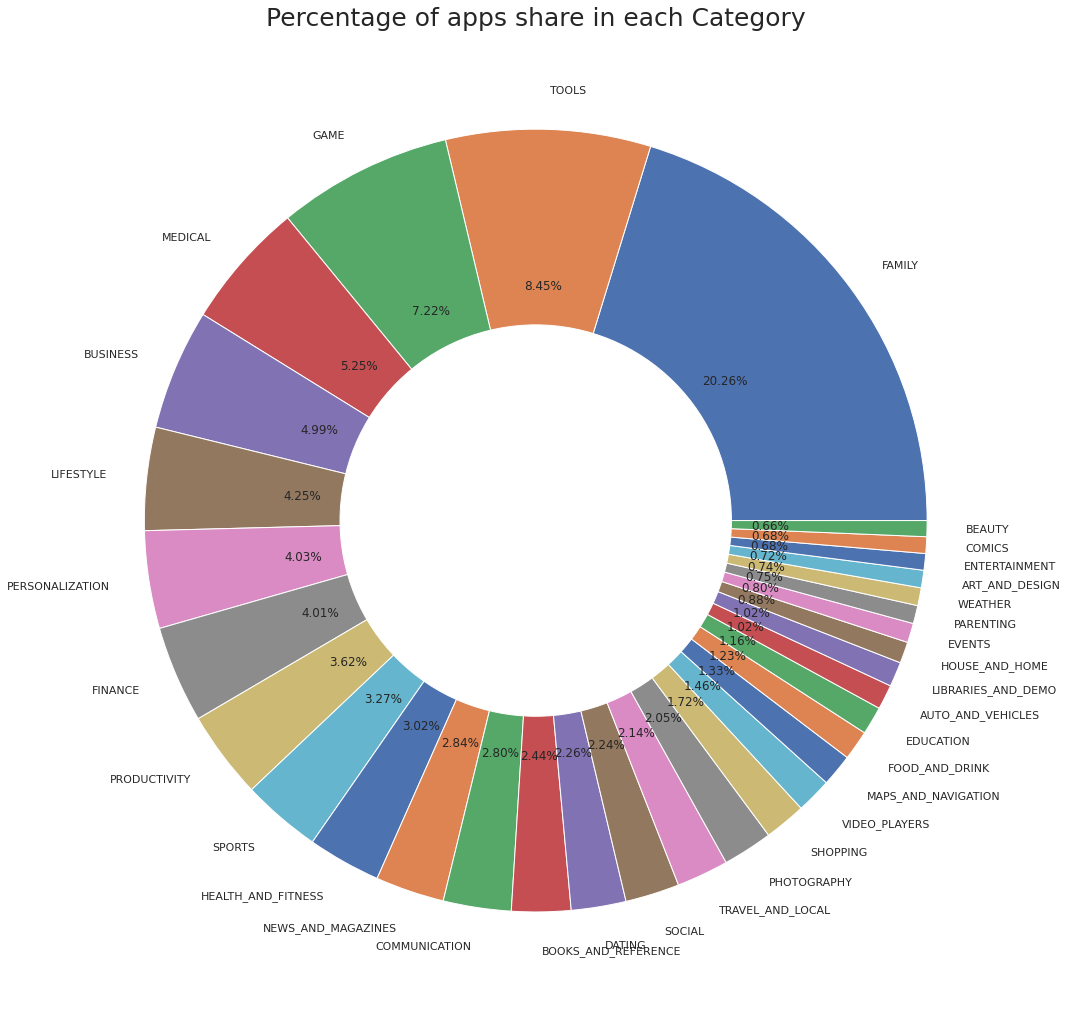

In [86]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(PSDF1.Category.value_counts(), labels=PSDF1.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of apps share in each Category', fontsize = 25)
plt.show()

From the above univariate study i.e doughnut chart we can conclude that there are greater number of apps related to categories: Family- 20.2% Game- 10.8% Tools-7.22%

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


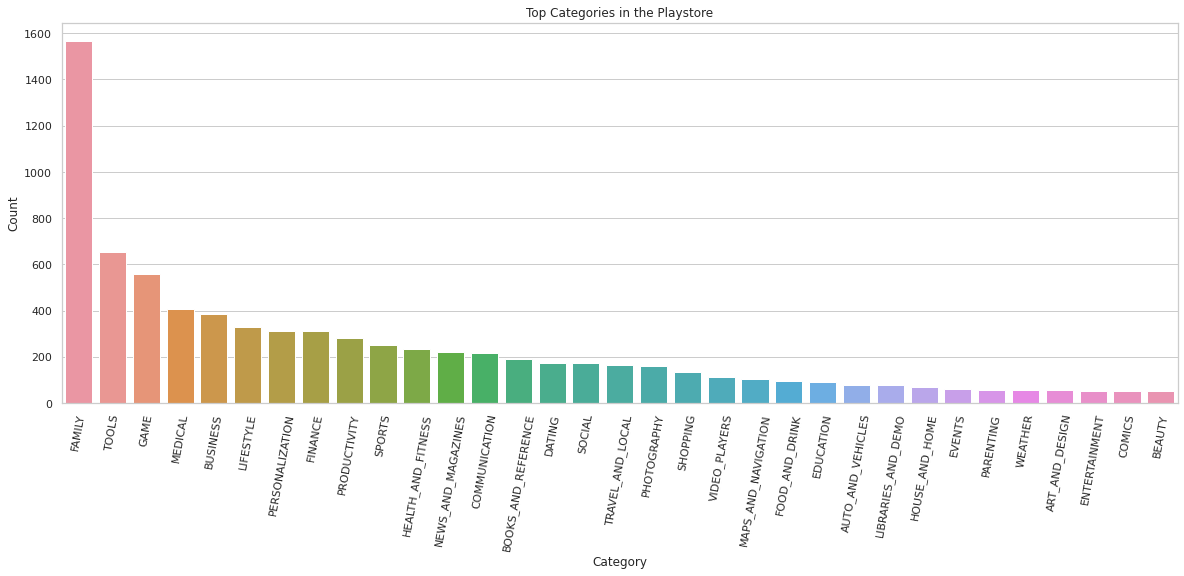

In [58]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top Categories in the Playstore")
sns.barplot(top_categories.index,top_categories.values)

From above graph we can conclude that there is 1939 applications which falls under FAMILY category.

Also top 5 categories of Application in the playstore are FAMILY,GAME,TOOLS,,BUSINESS,MEDICAL.

Also there is only 53 applications which falls under BEAUTY category.
We can also conclude that there is significant difference between the top two categories FAMILY 1939 Apps and GAME 1121 Apps. This shows that there are more application developers who develops Apps under FAMILY Category.

**Top 35 genres**

In [59]:
top_genres = PSDF1['Genres'].value_counts().sort_values(ascending=False).head(35)

print(top_genres)

Tools                      654
Education                  490
Entertainment              483
Medical                    406
Business                   386
Lifestyle                  329
Personalization            312
Finance                    310
Productivity               280
Sports                     254
Health & Fitness           234
News & Magazines           220
Communication              217
Books & Reference          189
Dating                     175
Social                     173
Action                     171
Travel & Local             165
Photography                159
Simulation                 143
Shopping                   133
Video Players & Editors    113
Casual                     108
Maps & Navigation          103
Arcade                     103
Food & Drink                95
Puzzle                      83
Auto & Vehicles             79
Libraries & Demo            79
Role Playing                75
House & Home                68
Events                      62
Weather 

**Plotting genres w.r.t apps**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


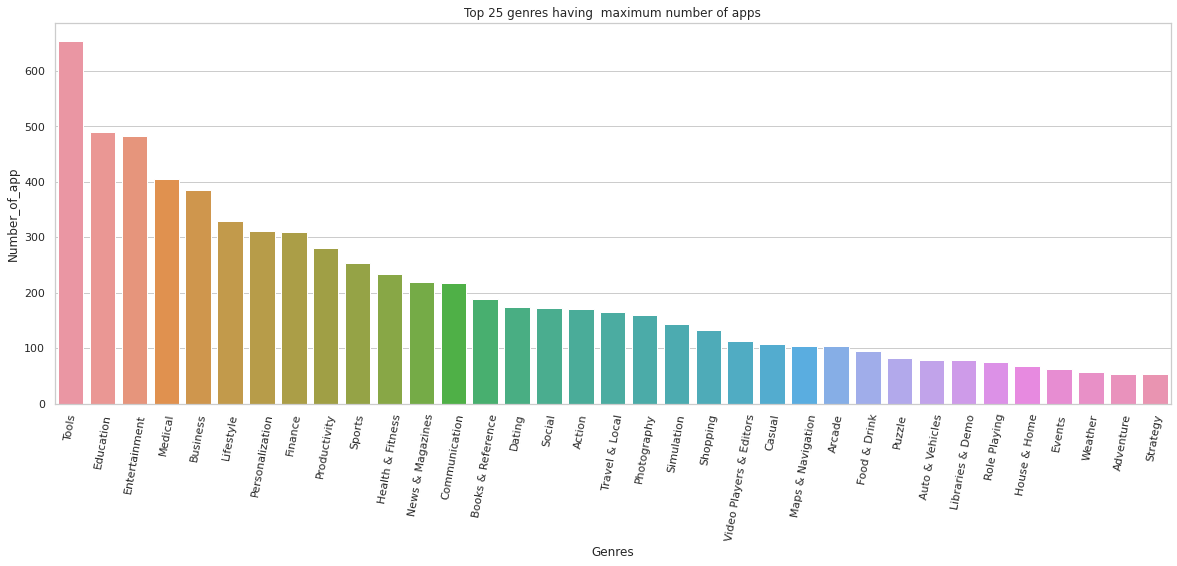

In [60]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=80)
plt.xlabel("Genres")
plt.ylabel("Number_of_app")
plt.title("Top 25 genres having  maximum number of apps")
sns.barplot(top_genres.index,top_genres.values)

From above bar plot in plotly we can conclude that maximum application which have been developed falls under App Genre Tools 840.

Also from above we can observe from above plot that least applications were developed under App Genre Entermainment,Music & Video 23.

Also top 5 Genres are Tools,Entertaiment,Education,business and Medical which are 840,587,427,407,460 in Top 5 Genre name order.

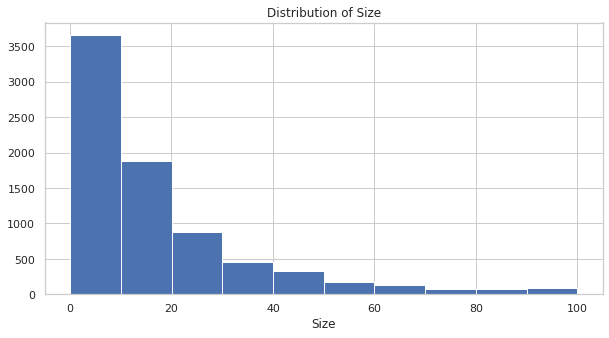

In [61]:
# Histogram of size column
plt.figure(figsize= (10,5))
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(PSDF1['Size']);
plt.show()

Text(0.5, 1.0, 'Paid Vs Free apps')

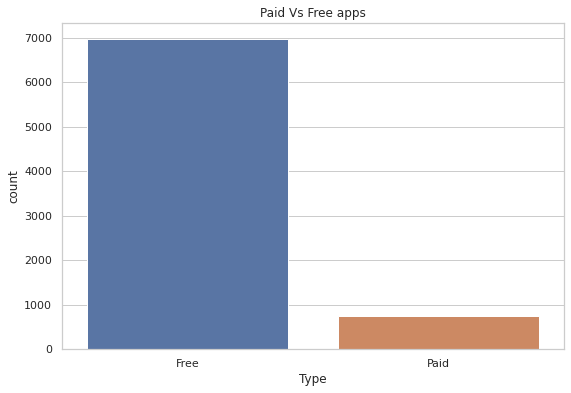

In [62]:
# Visualising 'Type' column using barplot and Pie-chart
plt.figure(figsize= (9, 6))
sns.countplot(x= 'Type', data= PSDF1)
plt.title('Paid Vs Free apps')

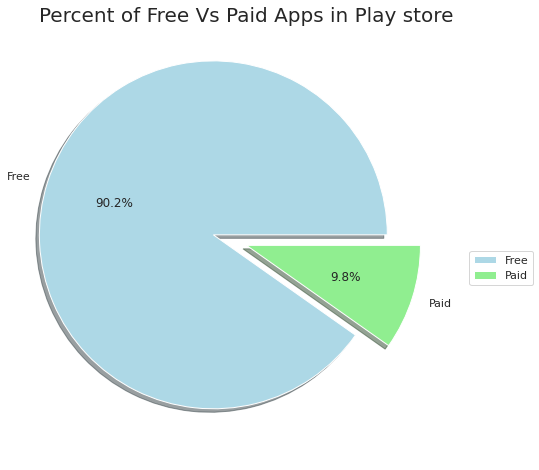

In [63]:
# Pie Chart for Type column
plt.figure(figsize=(10,8))
labels = PSDF1['Type'].value_counts(sort = True).index
sizes = PSDF1['Type'].value_counts(sort = True)
colors = ["lightblue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode= explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in Play store',size = 20)
plt.legend(labels= labels, bbox_to_anchor=(1,0.5))
plt.show()

Findings:

There are 92.6% of free apps in the play store vs 7.8% of paid apps.

There are more free apps than paid apps. Since most of the apps are cost free, there are more chances for the common people to install the apps easily and use it for their daily needs and other uses increases the app engagement by users which positively impacts the success rate of the apps in the Play store.

Text(0, 0.5, 'Apps(Count)')

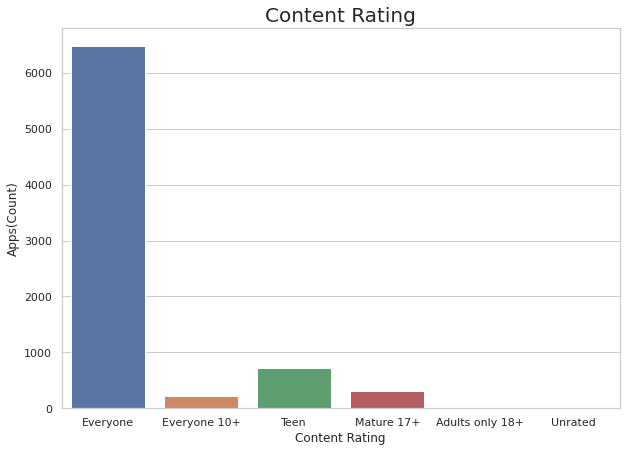

In [64]:
plt.figure(figsize=(10,7))
sns.countplot(x='Content Rating', data= PSDF1)
# plt.xticks(rotation=50)
plt.title('Content Rating', size= 20)
plt.ylabel('Apps(Count)')

Findings:

There are 6 categories in content rating out of which majority of the apps are available for 'Everyone'. Next category of content rating apps are used by only 'Teen'. Next apps are rated as to be used by 'Mature 17+' followed by 'Everyone 10+'
This shows that developers who list the apps for everyone have higher reachability and increased app engagement as compared to other content rating apps like 'Teens', 'Adults' etc.


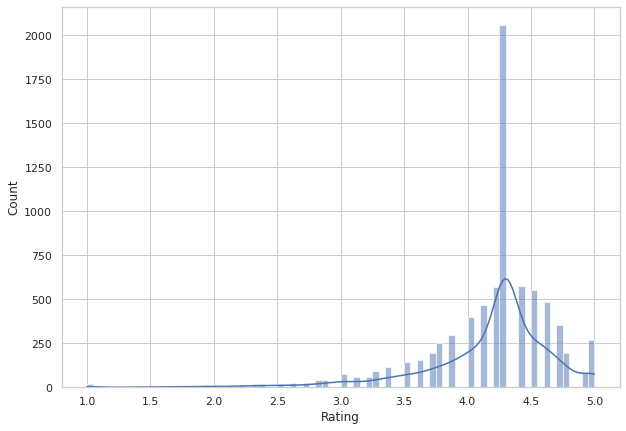

In [65]:
# Histogram for Rating column
plt.figure(figsize= (10,7))
sns.histplot(PSDF1['Rating'], kde= True)

# 2. **BIVARIATE ANALYSIS**

Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables.

We will compare two different features to get different insights from them.



In [66]:
PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design


Text(0.5, 1.0, 'Total app installs in each category')

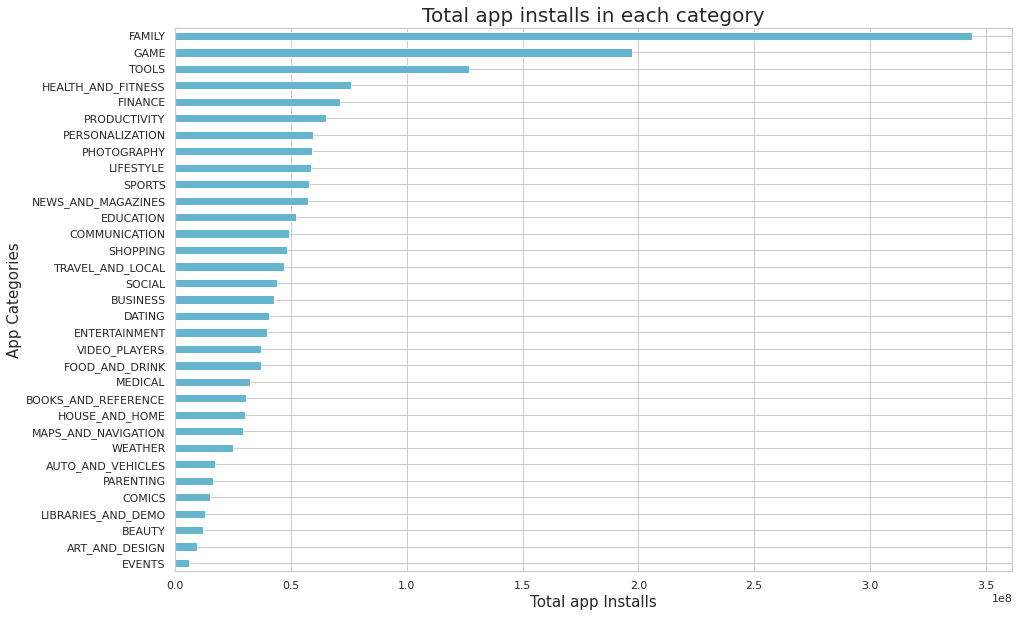

In [92]:
# total app installs in each category of the play store

a = PSDF1.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('App Categories', fontsize = 15)
plt.xlabel('Total app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

Findings:

'Games' Category has the maximum number of Installs followed by 'Communication' and 'Tools'.

The Category 'Games' has almost 14 Billion installations, next is 'Communication' which has around 11 Billion installations, then we have 'Tools' which has around 8 Billion installations. Rest other Categories have installations less than 6 Billion.

From this barplot we can infer that the developers who make apps related to 'Games', 'Communication' and 'tools' have a wide customer base as these categories have the maximum number of installations.

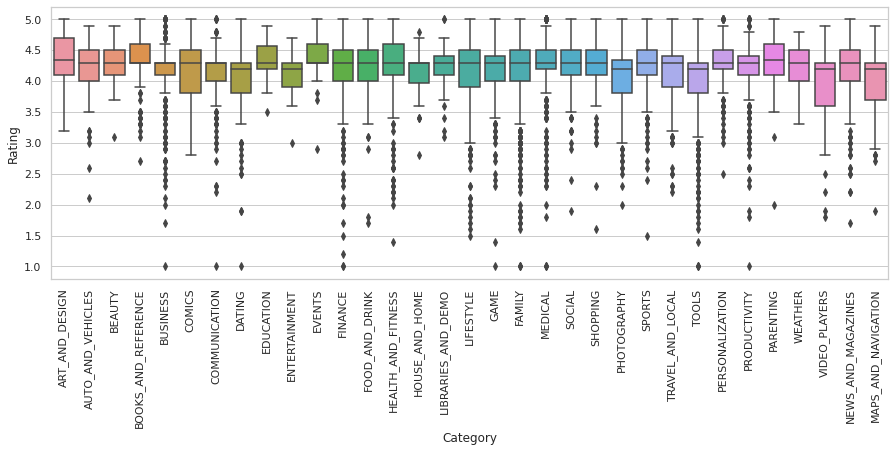

In [94]:
# Boxplot to visualise median of rating for each Categories
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=PSDF1)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

Findings:

From the above boxplot it can be seen that the median rating of all the categories are greater than 4.0. By knowing the reviews and improving the app features, it can help to improve the app engagement. Also by looking at the overall rating it can be said that this is a good sign for the high success rate of the apps.

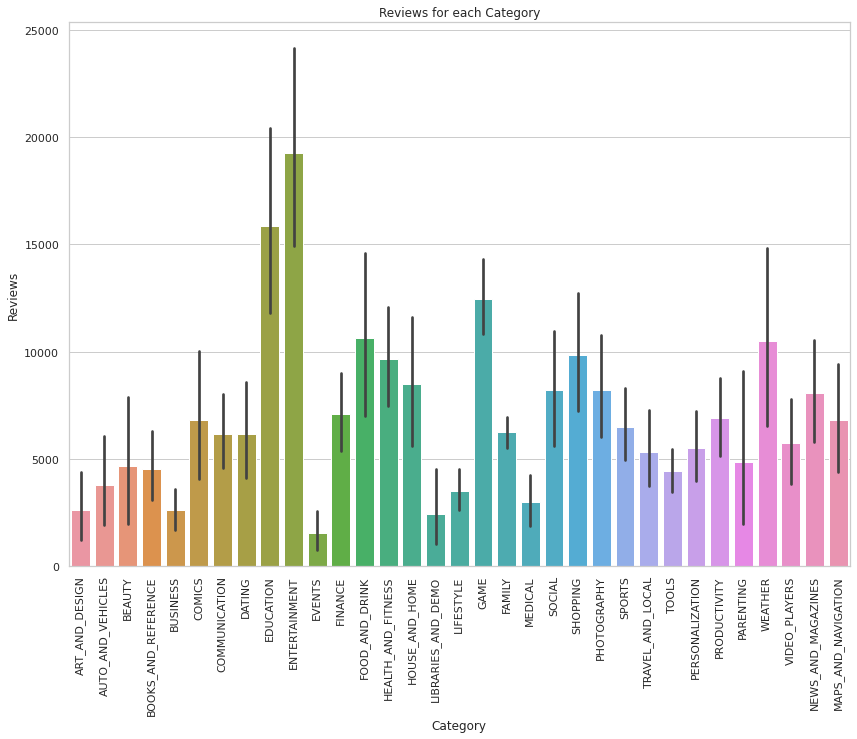

In [69]:
# Reviews according to Category
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Reviews for each Category")
sns.barplot(x='Category', y='Reviews', data=PSDF1)
plt.show()

Findings:

It can be seen from the above plot, the total number of reviews of all apps in each category. And also it can be seen that the reviews are highest for Games, Communication, Tools and Social Categories.

The Category 'Game' has 622 Million reviews, next 'Communication' has around 286 Million reviews. Categories like Tools and Social around 229 and 228 Million reviews respectively. Rest all categories have reviews less than 150 Million.

In [70]:
top_genres = PSDF1['Genres'].value_counts().sort_values(ascending=False).head(35)

print(top_genres)

Tools                      654
Education                  490
Entertainment              483
Medical                    406
Business                   386
Lifestyle                  329
Personalization            312
Finance                    310
Productivity               280
Sports                     254
Health & Fitness           234
News & Magazines           220
Communication              217
Books & Reference          189
Dating                     175
Social                     173
Action                     171
Travel & Local             165
Photography                159
Simulation                 143
Shopping                   133
Video Players & Editors    113
Casual                     108
Maps & Navigation          103
Arcade                     103
Food & Drink                95
Puzzle                      83
Auto & Vehicles             79
Libraries & Demo            79
Role Playing                75
House & Home                68
Events                      62
Weather 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



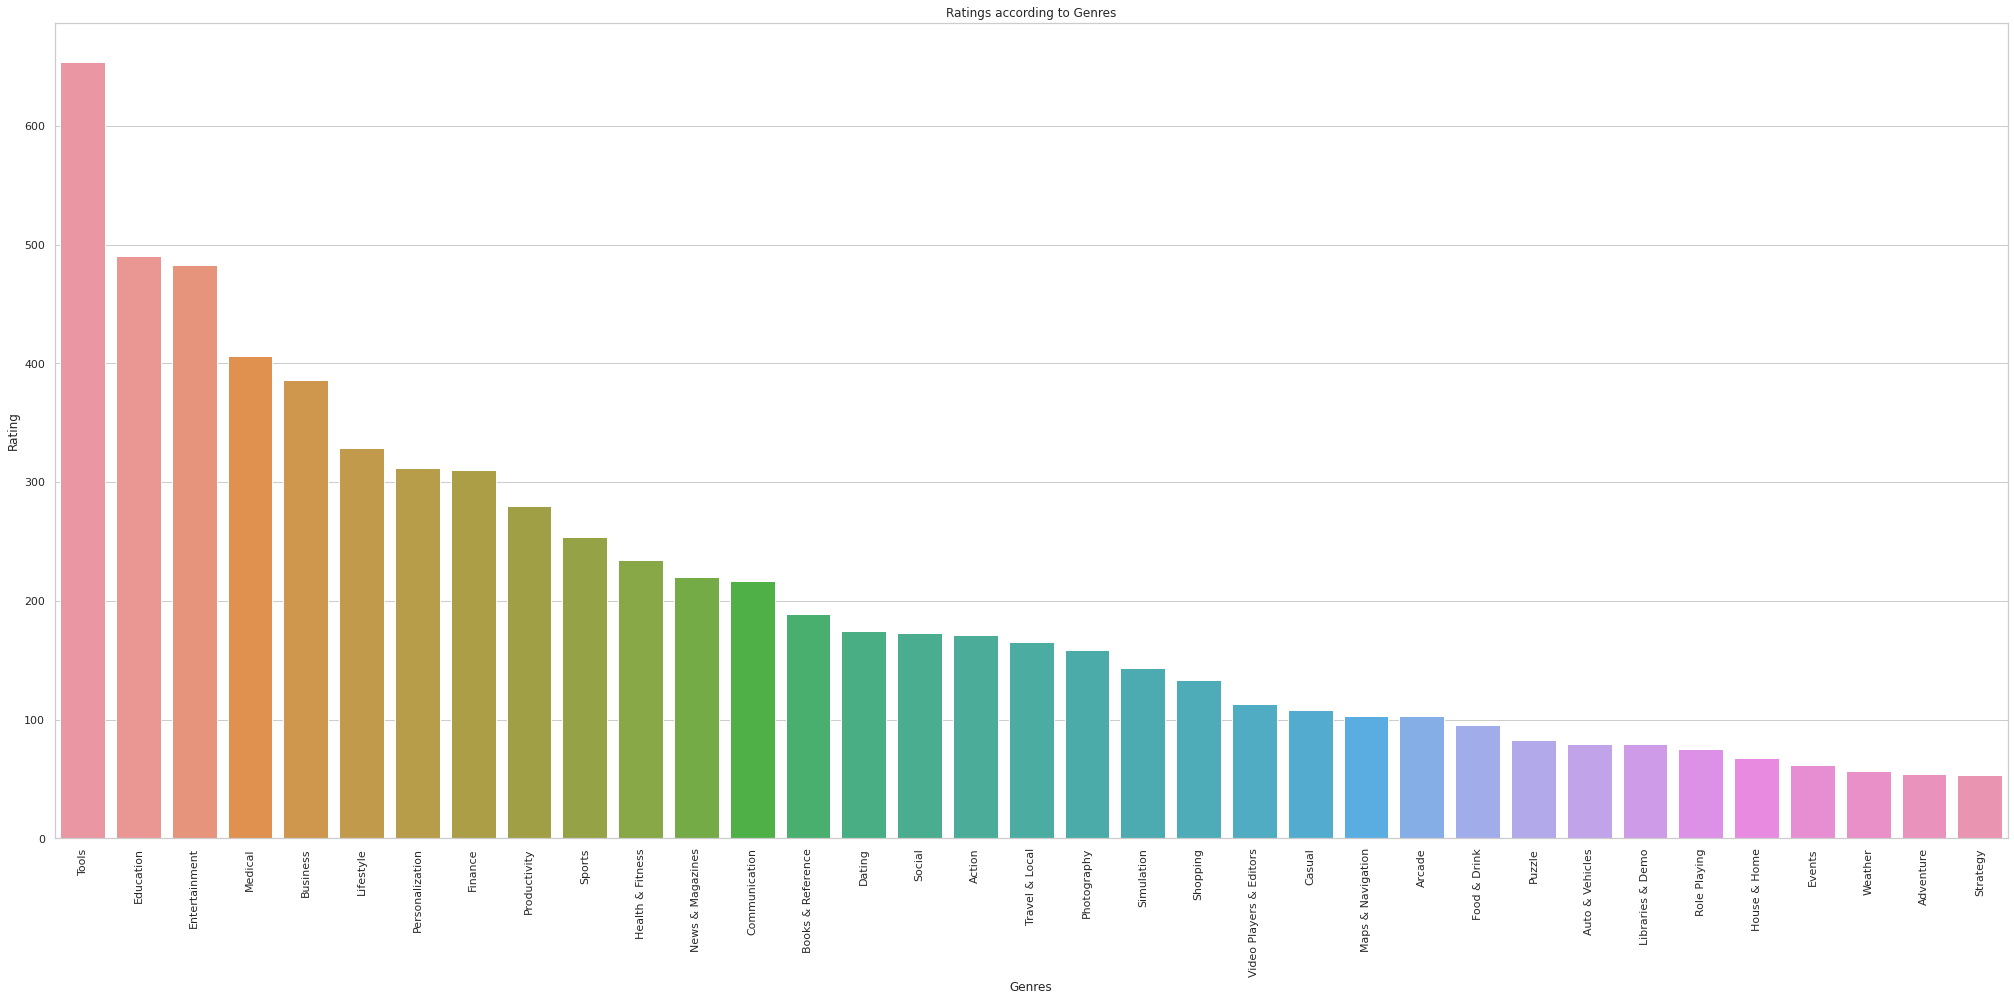

In [79]:
plt.figure(figsize=(35,15))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(top_genres.index,top_genres.values)

In [72]:
# Creating a df containing only paid apps

PAID_PSDF1 = PSDF1[PSDF1['Type'] == 'Paid']
PAID_PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business
390,Puffin Browser Pro,COMMUNICATION,4.0,18247,13.0,100000,Paid,3.99,Everyone,Communication
429,"Moco+ - Chat, Meet People",DATING,4.2,1545,13.0,10000,Paid,3.99,Mature 17+,Dating
430,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating


Text(0.5, 1.0, 'Average price of paid apps in each category')

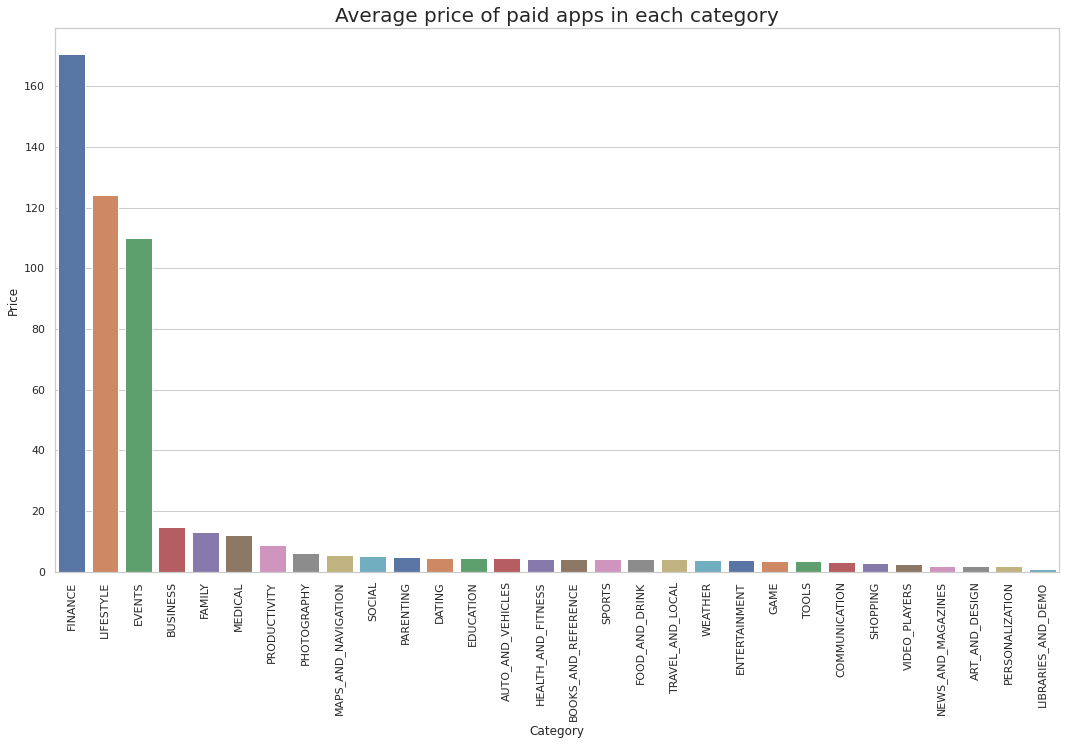

In [82]:
# Average price of paid apps in each category

Cat_price= PAID_PSDF1.groupby('Category')['Price'].mean().reset_index().sort_values(by= 'Price', ascending=False)
plt.figure(figsize= (18,10))
plt.xticks(rotation=90)
sns.barplot(x='Category', y= 'Price', data= Cat_price, palette= 'deep')
plt.title('Average price of paid apps in each category', fontsize= 20)

Text(0.5, 1.0, 'Average Size of apps per Category in MB')

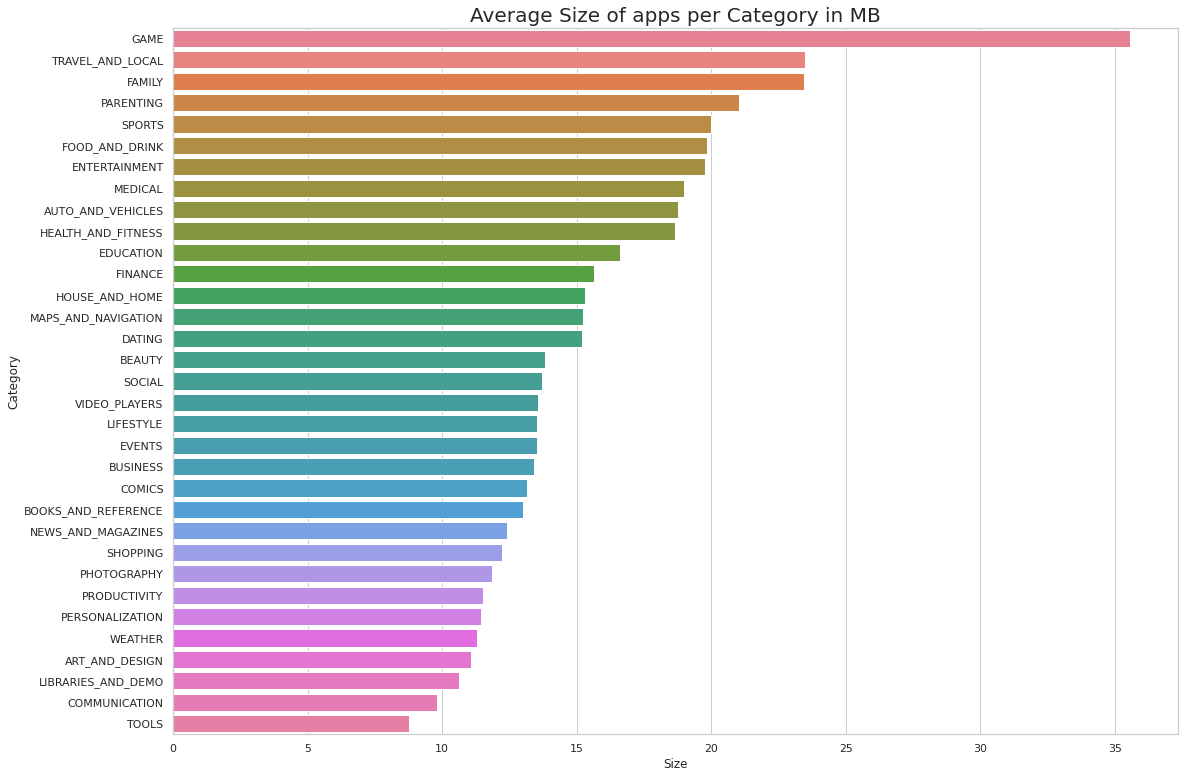

In [93]:
# Barplot to visualise Category and Reviews column

Cat_wise_reviews= PSDF1.groupby('Category')['Size'].mean().reset_index().sort_values(by= 'Size', ascending= False)

plt.figure(figsize= (18,13))
sns.barplot(x='Size', y= 'Category', data= Cat_wise_reviews, palette= 'husl')
plt.title('Average Size of apps per Category in MB', fontsize= 20)

From the above plot we can infer that the Game category has a high average size of apps which is around 40 MB followed by the 'Family' and 'Sports' category.

In [85]:
fig2=px.bar(PSDF1,x='Rating',y='Reviews',color='Rating',title='Relationship between Rating and average Reviews',width=1000, height=600)
fig2.show()

Findings:

from the above graph we can conclude that as the rating increases the average reviews for each ratings also increases. Also we can observe some deviation after 4.5 rating as we can see 4.5 rating has maximum no.of reviews of 1.1M and reviews increases in quite proportionate manner with the increase of rating but after 4.5 rating reviews eventually decreases and we can see only around 26586 reviews.


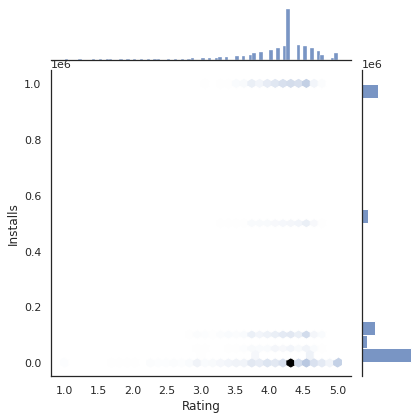

In [96]:
# Joint plot to visualise Ratings, Installs columns
sns.set(style='white')
sns.jointplot(x = 'Rating',y = 'Installs',data = PSDF1,kind = 'hex')

# 3. **Multivariate Analysis**

Multivariate analysis is required when more than two variables have to be analyzed simultaneously. There are more than 20 different ways to perform multivariate analysis and which one to choose depends upon the type of data and the end goal to achieve.

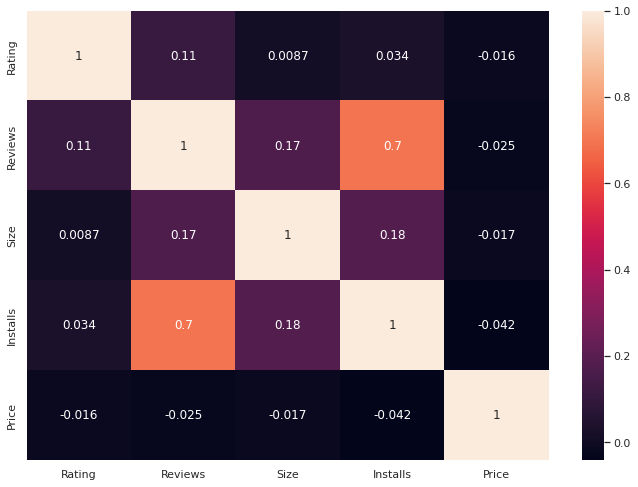

In [105]:
# Coorelation heatmap of PlayStore df

coor_matrix= PSDF1.corr()
sns.heatmap(coor_matrix, annot= True)

There exists a positive correlation between 'Installs' and 'Reviews' columns which means if the number of installation of apps increases then the reviews for the app will tend to increase too. 
The above heatmap shows that
Users have installed more apps of the ones having high reviews i.e installs and reviews are highly corelated.
Installs of app doesn't depends on Size i.e. there is no correlation between them

# **Which apps have maximum installs?**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



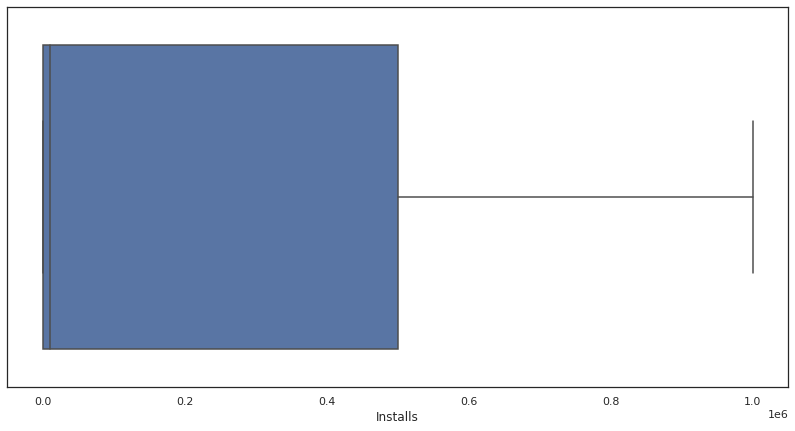

In [106]:
# looking at the distribution of Installed apps

plt.figure(figsize=(14,7))
sns.boxplot(PSDF1.Installs)

In [108]:
# Sorting apps on the basis of installation in descending order

PSDF1[PSDF1.Installs>0.4e06].sort_values(by='Installs',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
3357,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35.0,1000000,Free,0.0,Everyone 10+,News & Magazines
3418,NAVITIME Bus Transit JAPAN,MAPS_AND_NAVIGATION,3.7,6939,13.0,1000000,Free,0.0,Everyone,Maps & Navigation
8877,MLP Colouring Adventures,FAMILY,3.8,7379,61.0,1000000,Free,0.0,Everyone,Entertainment
8881,Home Pony 2,FAMILY,4.0,20977,26.0,1000000,Free,0.0,Everyone,Simulation
8897,TAXI DRIVER,FAMILY,3.7,7203,32.0,1000000,Free,0.0,Everyone,Simulation
...,...,...,...,...,...,...,...,...,...,...
4078,R. Physics Puzzle Game,FAMILY,4.2,5369,60.0,500000,Free,0.0,Everyone,Puzzle
4126,Crime Wars S. Andreas,GAME,4.3,5785,93.0,500000,Free,0.0,Teen,Racing
4149,T-Mobile Content Transfer,PRODUCTIVITY,4.1,370,29.0,500000,Free,0.0,Everyone,Productivity
4174,"U - Webinars, Meetings & Messenger",COMMUNICATION,4.1,6601,31.0,500000,Free,0.0,Everyone,Communication


The above table shows that, few apps are such that they are installed in every mobile and thus their 'Installs' have reached 10^9. Those obvious apps are:
Google Play Books
Google Street View
Google Drive
Messenger – Text and Video Chat for Free
Thus, we can conclude that our dataset is working fine and giving correct results.

# **EDA on Review Dataset**
### **Data Exploration**
Exploring the PSDF2 using head, tail, info and describe.

In [111]:
PSDF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [112]:
PSDF2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [113]:
PSDF2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000
64236,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [114]:
PSDF2.shape

(30679, 5)

In [115]:
col_name = PSDF2.columns

In [116]:
col_name

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

# **DROPPING DUPLICATE VALUES**

In [119]:
len(PSDF2[PSDF2.duplicated()])

0

No duplicates present

## **CHECKING NULL OR MISSING VALUES**

In [120]:
PSDF2.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

## **CHECKING OUTLIERS**

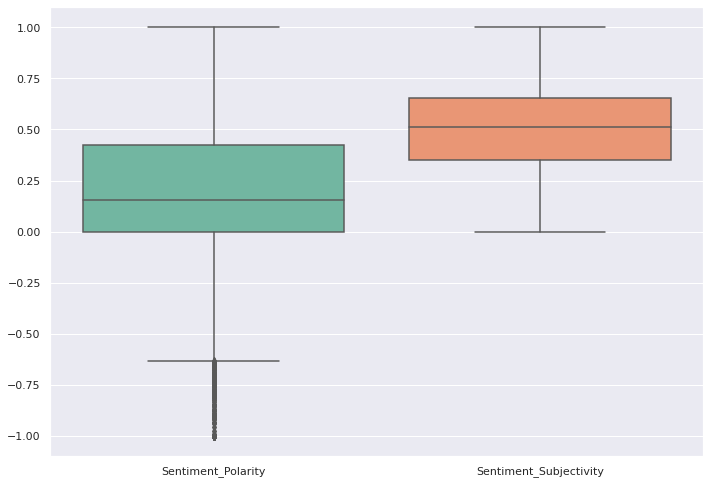

In [121]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=PSDF2, orient="v", palette="Set2")

## **DEFINE A FUNCTION**

In [123]:
def playstoreinfo2():
  temp=pd.DataFrame(index=PSDF2.columns)
  temp["datatype"]=PSDF2.dtypes
  temp["not null values"]=PSDF2.count()
  temp["null value"]=PSDF2.isnull().sum()
  temp["% of the null value"]=PSDF2.isnull().mean()
  temp["unique count"]=PSDF2.nunique()
  return temp
playstoreinfo2()


,datatype,not null values,null value,% of the null value,unique count
App,object,30679,0,0.000000,1074
Translated_Review,object,29692,987,0.032172,27994
Sentiment,object,29697,982,0.032009,3
Sentiment_Polarity,float64,29697,982,0.032009,5410
Sentiment_Subjectivity,float64,29697,982,0.032009,4474


In [124]:
PSDF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [125]:
PSDF2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


### **Replacing nan values in size with the its median value**

In [127]:
PSDF2.Sentiment_Polarity.fillna(PSDF2.Sentiment_Polarity.median(),inplace=True)

In [128]:
PSDF2.Sentiment_Subjectivity.fillna(PSDF2.Sentiment_Subjectivity.median(),inplace=True)

In [129]:
PSDF2['Translated_Review'].mode()

0    Good
dtype: object

In [130]:
PSDF2['Sentiment'].mode()

0    Positive
dtype: object

In [137]:
PSDF2['Translated_Review'].fillna('Good',inplace=True)
PSDF2['Sentiment'].fillna('Positive',inplace=True)

In [138]:
PSDF2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now, the review dataset is cleaned, we can perform EDA on it.

# **EDA ON USER REVIEW DATA SET**

**Which type of sentiments users generally prefer to give?**

Positive    19997
Negative     6321
Neutral      4361
Name: Sentiment, dtype: int64


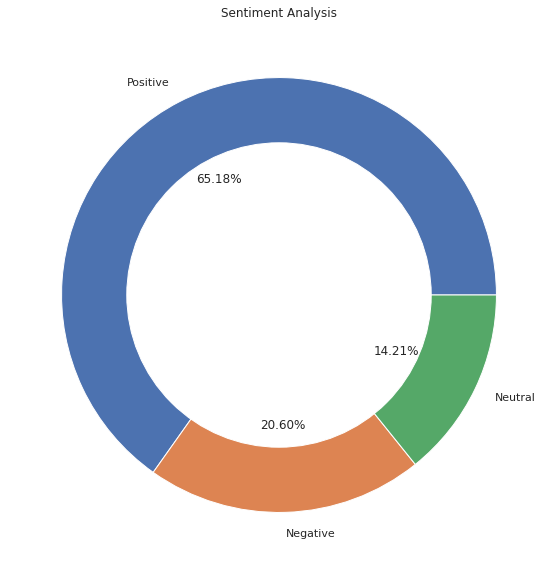

In [139]:
# Counting and plotting different Sentiments in dataset

print(PSDF2.Sentiment.value_counts())
plt.figure(figsize=(20,10))

plt.pie(PSDF2.Sentiment.value_counts(),labels=PSDF2.Sentiment.value_counts().index, autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis')
plt.show()

From above doughnut chart it is clear that the apps have around
64.04% positive sentiments
21.29% Neutral sentiments
14.67% Negative sentiments

Merging the two datasets for more detailed analysis

In [140]:
# merging 'category' and 'type' of df1 with df2 using inner join

merged_df = pd.merge(PSDF2, PSDF1[["App",'Category',"Type"]] , how='inner', on="App")

# Drop null values from sentiment datax`
merged_df = merged_df.dropna()

merged_df.shape

(15303, 7)

In [141]:
# Looking at initial five rows of merged columns

merged_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Type
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,Free
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,Free
2,10 Best Foods for You,Good,Positive,0.157143,0.514286,HEALTH_AND_FITNESS,Free
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,Free
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,Free


## **Does the sentiments differ for paid or free apps?**

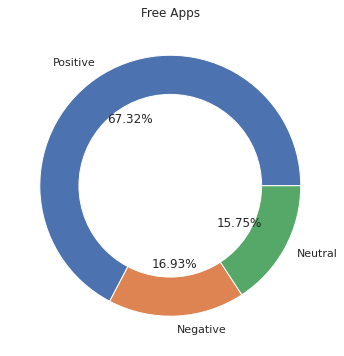

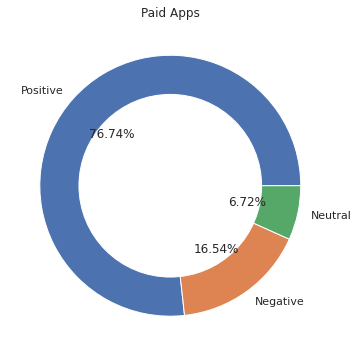

In [142]:
# Looking at the ratio of different sentiments for paid and free apps

free_apps = merged_df[merged_df["Type"] == "Free"]
paid_apps = merged_df[merged_df["Type"] == "Paid"]
for i in [free_apps,paid_apps]:
  plt.figure(figsize=(10,6))
  plt.title(i.Type.unique()[0]+' Apps')
  plt.pie(i.Sentiment.value_counts(),labels=i.Sentiment.value_counts().index, autopct='%1.2f%%')
  my_circle=plt.Circle( (0,0), 0.7, color='white')
  p=plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

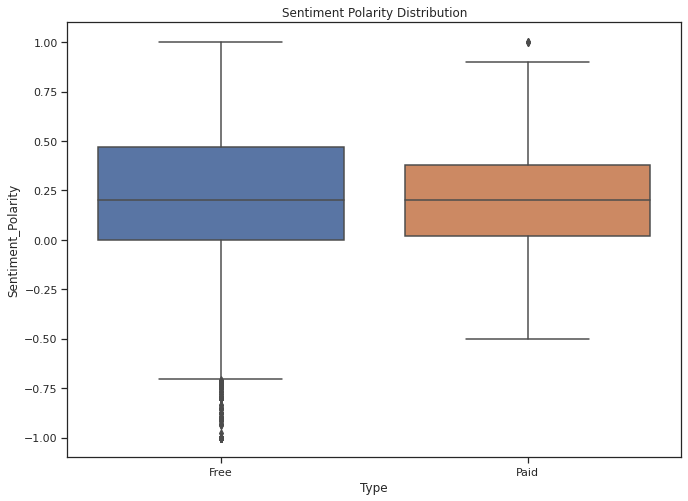

In [143]:
# Plotting sentiment polarity scores of user reviews for paid and free apps

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

From above two univariate and bivariate plots on sentiment polarity vs type, we can observe that users gave more positive sentiments, for paid apps, while looking at the outliers of box plot we can say that they were more harsh while giving reviews for free apps. It means paid apps have high quality than of free apps in general. Also, it can be inferred that neutral sentiments are less for paid ones i.e users are true to reviews once they have paid for it.

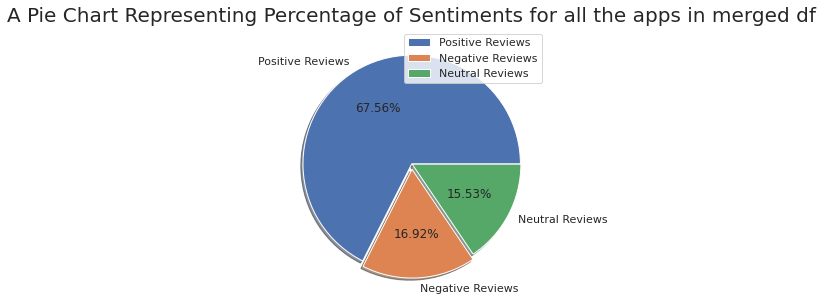

In [150]:
# Pie chart for Sentiments in Merged Dataframe

counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Sentiments for all the apps in merged df', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

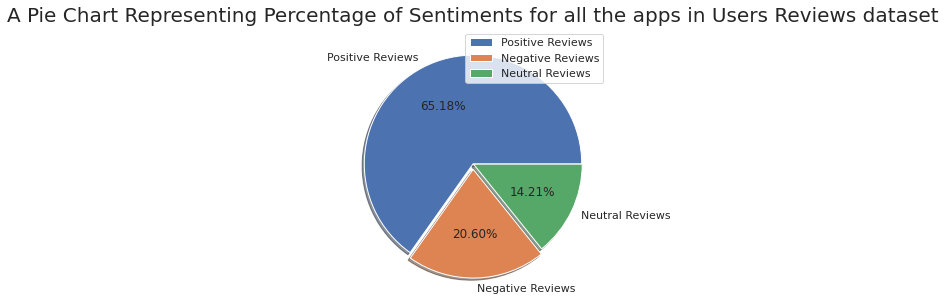

In [149]:
# Pie chart for Sentiments in User Reviews Dataframe

counts1 = list(PSDF2['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(counts1, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Sentiments for all the apps in Users Reviews dataset', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

In [154]:
# Merging the Play Store data with User Reviws data on Application column
merged_df = PSDF1.merge(PSDF2, on="App")
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count']) # Log transformed values for Sentiment count

In [155]:
category_sentiment

,Category,Sentiment,Sentiment Count,log_sentiment_count
0,ART_AND_DESIGN,Negative,48,5.584963
1,ART_AND_DESIGN,Neutral,47,5.554589
2,ART_AND_DESIGN,Positive,189,7.562242
3,AUTO_AND_VEHICLES,Negative,16,4.000000
4,AUTO_AND_VEHICLES,Neutral,36,5.169925
...,...,...,...,...
94,VIDEO_PLAYERS,Neutral,33,5.044394
95,VIDEO_PLAYERS,Positive,77,6.266787
96,WEATHER,Negative,7,2.807355
97,WEATHER,Neutral,11,3.459432


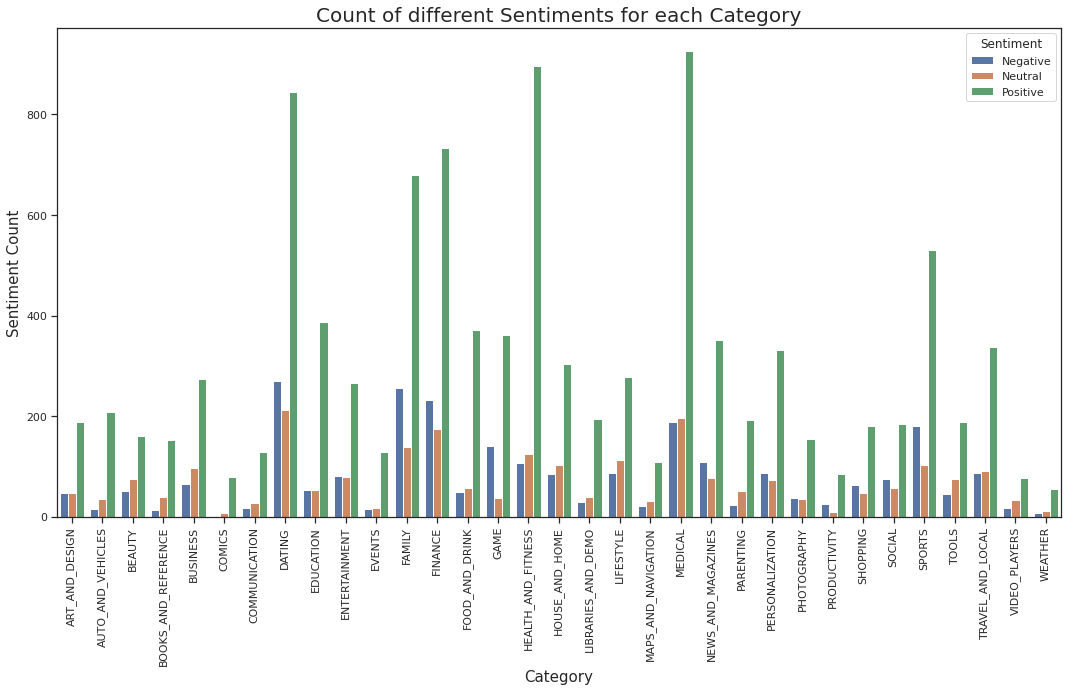

In [156]:
# Bar plot for different Sentiments for Each categories
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiment Count", fontsize=15)
plt.title("Count of different Sentiments for each Category",fontsize=20)
sns.barplot(x='Category',y='Sentiment Count', hue='Sentiment', data=category_sentiment);

Findings

The Play Store data is merged with the User Reviews dataset on the App column. Form the merged Dataset the count of different Sentiments like Positive, Negative and Neutral is calculated based on each category.

From the above count plot we can infer that there are more number of Positive reviews than Negative and Neutral reviews among all the apps. The highest positive and negative reviews are received by apps in the Game Category.

Most of the apps have more positive reviews than negative and neutral reviews which says the Play store apps business is good and the success rate for the apps is also much higher even though there are some negative reviews in User reviews dataset with good app engagement features in the apps.

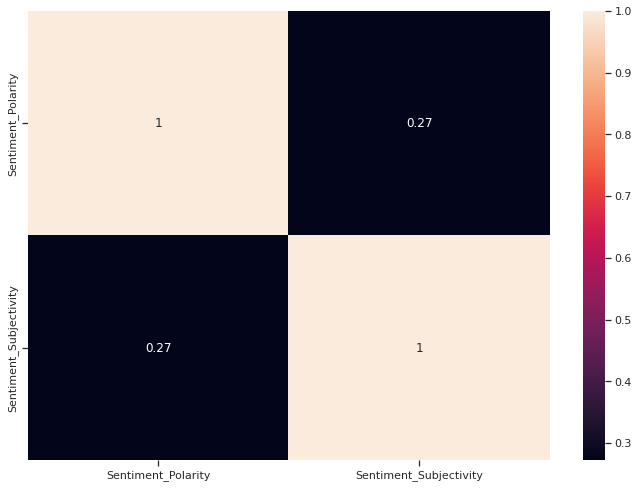

In [148]:
# Coorelation heatmap of User Reviews df

cor_matrix= PSDF2.corr()
sns.heatmap(cor_matrix, annot= True)

Sentiment polarity and subjectivity have little correlation between them and it doesn't affect much as it doesn't have high multicollinearity.

Sentiment polarity and subjectivity have little correlation between them and it doesn't affect much as it doesn't have high multicollinearity.

# **Analysis Summary:**
Percentage of free apps = 92.2%
Percentage of Paid apps = 7.8&
Most competitive category: Family
Top Genres: Tools
Category with the highest number of installs and reviews: Game
Category with the highest average app installs: Communicaction
Category in which the paid apps have the highest average installation fee: Finance
Most popular app in the Play Store based on the number of reviews: Facebook
The median size of all apps in the play store is 13 MB.
User reviews contain mostly positive words and the most used words are Game, good, app, great etc according to WordCloud.
There are more number of Positive reviews as compared to Negative and Neutral reviews.
Median rating of all the categories are greater than 4.0
There is Positive correlation between Installs and Reviews columns.

# **Conclusion**


The marketplace is crowded with all types of mobile apps as it has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Today, even businesses who never would’ve needed apps in the past are getting into the game to meet customer demand for an app that makes their lives easier or to stay ahead of the tech curve.

Thus, through this exhaustive analysis of approx. 10k apps we discovered following key factors responsible for app engagement and success in recent study:

We found that among 33 unique app categories present in our dataset, apps related to Games and Medical have the highest market prevalence according to their ratings though there are greater number of apps related to family and tools as well.
But, the number of installs are higher for Communication, Social and productivity genres whereas Tools, Entertainment, Education related genres have maximum number of apps among all 119 genres.
It was interesting to note that
Users have paid more for lite and high rating apps.
Users have installed more apps of the ones having high reviews
Installs of app doesn't depends on Size.
From the sentiment analysis we found users showed more positive sentiments for paid apps and were harsh while showing sentiments for free apps. Also, Neutral sentiments were less for paid ones i.e users were true to reviews once they have paid for it.
Users gave maximum reviews for game category followed by family. Also, the positive and negative sentiments were highest for games category.


After thorough analysis it can be said that the most important features that help in predicting the success rate of an app are the Rating, Reviews, Installs and Type of an app.

The features in Users review dataset that would help in the success rate and app engagement are Sentiment then Sentiment polarity and subjectivity.

There are many categories of apps present in the play store and the apps that are high in particular categories are Communication, Social and Gaming apps. It can be inferred that these apps are more successful and have high app engagement.

From the analysis it is seen that there are a good number of apps with positive reviews than negative and neutral reviews.

There are more apps in the Play store that are given reviews by the users. There are more ratings given to an app than the reviews. "Yes, I do it too" and from the analysis we can say that most user's fall under the same category as it's a choice to rate and review the app. As review takes time so many just rate the app and avoid reviewing.



Takeaways for the Developer's:
Developing apps related to the least categories as they are not explored much. Like events and beauty etc.
Most of the apps are Free, so focusing on free apps is more important.
Focusing more on content available for Everyone will increase the chances of getting the highest installs.
The sentiments of the user keep varying as they keep using the app, so it's important to focus more on users needs and features and make changes in the apps accordingly.